In [ ]:
# By Eashrat Jahan Muniya, Farahdiba Zarin, Ruth Kehali Kassahun
from google.colab import drive
import nibabel as nib
from glob import glob
import os 
import glob

import numpy as np
import matplotlib.pyplot as plt
from nibabel.testing import data_path
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from numpy.linalg import inv, det, norm
from math import sqrt, pi
from functools import partial
from scipy.spatial.distance import dice
import time
import operator
import math
import cv2

In [ ]:
import numpy as np

In [ ]:
import pandas as pd
!pip install --upgrade category_encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def show_img(img):   
    plt.figure()
    plt.imshow(img.T, cmap='gray',origin='lower')

In [ ]:
def calc_dice(segmented_images, groundtruth_images):
    segData = segmented_images + groundtruth_images
    TP_value = np.amax(segmented_images) + np.amax(groundtruth_images)
    TP = (segData == TP_value).sum()  # found a true positive: segmentation result and groundtruth match(both are positive)
    segData_FP = 2. * segmented_images + groundtruth_images
    segData_FN = segmented_images + 2. * groundtruth_images
    FP = (segData_FP == 2 * np.amax(segmented_images)).sum() # found a false positive: segmentation result and groundtruth mismatch
    FN = (segData_FN == 2 * np.amax(groundtruth_images)).sum() # found a false negative: segmentation result and groundtruth mismatch
    return 2*TP/(2*TP+FP+FN) 

#Loading test labels 

In [ ]:
label_test=[]
for directory_path in sorted( glob.glob("/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/testing_labels")):
    print(directory_path)
    for img_path in sorted (glob.glob(os.path.join(directory_path, "*.nii.gz"))):
        print(img_path)
        img = nib.load(img_path)
        img_data=img.get_fdata()
        label_test.append(img_data)

/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/testing_labels
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/testing_labels/1003_3C.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/testing_labels/1004_3C.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/testing_labels/1005_3C.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/testing_labels/1018_3C.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/testing_labels/1019_3C.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/testing_labels/1023_3C.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/testing_labels/1024_3C.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/testing_labels/1025_3C.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/testing_labels/1038_3C.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/testing_labels/1039_3C.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/testing_label

# Tissue Model & Label Propagation CSF Our Atlas

In [ ]:

csf_test=[]
#gm_test=[]
#wm_test=[]

for directory_path in sorted(glob.glob("/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_atlas/CSF*")):
    print(directory_path)
    for img_path in glob.glob(os.path.join(directory_path, "*.nii")):
        print(img_path)
        img = nib.load(img_path)
        img_data=img.get_fdata()
        csf_test.append(img_data)
      

/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_atlas/CSF
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_atlas/CSF/CSF_atlas_registered_probability_10_1003.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_atlas/CSF/CSF_atlas_registered_probability_10_1004.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_atlas/CSF/CSF_atlas_registered_probability_10_1005.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_atlas/CSF/CSF_atlas_registered_probability_10_1018.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_atlas/CSF/CSF_atlas_registered_probability_10_1019.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_atlas/CSF/CSF_atlas_registered_probability_10_1023.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_atlas/CSF/CSF_atlas_registered_probability_10_1024.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_at

In [ ]:

csf_tissue_model=[]
#gm_test=[]
#wm_test=[]

for directory_path in sorted(glob.glob("/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/tissue_model_probability_maps/CSF*")):
    print(directory_path)
    for img_path in glob.glob(os.path.join(directory_path, "*.nii.gz")):
        print(img_path)
        img = nib.load(img_path)
        img_data=img.get_fdata()
        csf_tissue_model.append(img_data)
      

/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/tissue_model_probability_maps/CSF
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/tissue_model_probability_maps/CSF/Tissue_Model_Probability_Map_CSF_1003.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/tissue_model_probability_maps/CSF/Tissue_Model_Probability_Map_CSF_1004.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/tissue_model_probability_maps/CSF/Tissue_Model_Probability_Map_CSF_1005.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/tissue_model_probability_maps/CSF/Tissue_Model_Probability_Map_CSF_1018.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/tissue_model_probability_maps/CSF/Tissue_Model_Probability_Map_CSF_1019.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/tissue_model_probability_maps/CSF/Tissue_Model_Probability_Map_CSF_1023.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/tissue_model_probability_maps/CSF/Tissue_Mod

# Tissue Model & Label Propagation WM Our Atlas

In [ ]:

#csf_test=[]
#gm_test=[]
wm_test=[]

for directory_path in sorted(glob.glob("/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_atlas/GM*")):
    print(directory_path)
    for img_path in glob.glob(os.path.join(directory_path, "*.nii")):
        print(img_path)
        img = nib.load(img_path)
        img_data=img.get_fdata()
        wm_test.append(img_data)
        

/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_atlas/GM
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_atlas/GM/GM_atlas_registered_probability_10_1003.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_atlas/GM/GM_atlas_registered_probability_10_1004.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_atlas/GM/GM_atlas_registered_probability_10_1005.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_atlas/GM/GM_atlas_registered_probability_10_1018.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_atlas/GM/GM_atlas_registered_probability_10_1019.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_atlas/GM/GM_atlas_registered_probability_10_1023.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_atlas/GM/GM_atlas_registered_probability_10_1024.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_atlas/GM/GM_atlas

In [ ]:

wm_tissue_model=[]

for directory_path in sorted(glob.glob("/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/tissue_model_probability_maps/WM*")):
    print(directory_path)
    for img_path in glob.glob(os.path.join(directory_path, "*.nii.gz")):
        print(img_path)
        img = nib.load(img_path)
        img_data=img.get_fdata()
        wm_tissue_model.append(img_data)
      

/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/tissue_model_probability_maps/WM
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/tissue_model_probability_maps/WM/Tissue_Model_Probability_Map_WM_1003.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/tissue_model_probability_maps/WM/Tissue_Model_Probability_Map_WM_1004.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/tissue_model_probability_maps/WM/Tissue_Model_Probability_Map_WM_1005.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/tissue_model_probability_maps/WM/Tissue_Model_Probability_Map_WM_1018.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/tissue_model_probability_maps/WM/Tissue_Model_Probability_Map_WM_1019.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/tissue_model_probability_maps/WM/Tissue_Model_Probability_Map_WM_1023.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/tissue_model_probability_maps/WM/Tissue_Model_Probability

# Tissue Model & Label Propagation GM Our Atlas

In [ ]:

#csf_test=[]
gm_test=[]
#wm_test=[]

for directory_path in sorted(glob.glob("/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_atlas/WM*")):
    print(directory_path)
    for img_path in glob.glob(os.path.join(directory_path, "*.nii")):
        print(img_path)
        img = nib.load(img_path)
        img_data=img.get_fdata()
        gm_test.append(img_data)
        

/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_atlas/WM
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_atlas/WM/WM_atlas_registered_probability_10_1003.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_atlas/WM/WM_atlas_registered_probability_10_1004.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_atlas/WM/WM_atlas_registered_probability_10_1005.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_atlas/WM/WM_atlas_registered_probability_10_1018.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_atlas/WM/WM_atlas_registered_probability_10_1019.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_atlas/WM/WM_atlas_registered_probability_10_1023.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_atlas/WM/WM_atlas_registered_probability_10_1024.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_atlas/WM/WM_atlas

In [ ]:

gm_tissue_model=[]

for directory_path in sorted(glob.glob("/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/tissue_model_probability_maps/GM*")):
    print(directory_path)
    for img_path in glob.glob(os.path.join(directory_path, "*.nii.gz")):
        print(img_path)
        img = nib.load(img_path)
        img_data=img.get_fdata()
        gm_tissue_model.append(img_data)
      

/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/tissue_model_probability_maps/GM
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/tissue_model_probability_maps/GM/Tissue_Model_Probability_Map_GM_1003.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/tissue_model_probability_maps/GM/Tissue_Model_Probability_Map_GM_1004.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/tissue_model_probability_maps/GM/Tissue_Model_Probability_Map_GM_1005.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/tissue_model_probability_maps/GM/Tissue_Model_Probability_Map_GM_1018.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/tissue_model_probability_maps/GM/Tissue_Model_Probability_Map_GM_1019.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/tissue_model_probability_maps/GM/Tissue_Model_Probability_Map_GM_1023.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/tissue_model_probability_maps/GM/Tissue_Model_Probability

# Multiply from 1.1 and 1.2 Our Atlas

In [ ]:
csf_multiplied=[]
gm_multiplied=[]
wm_multiplied=[]

for i in range(len(csf_test)):
  csf_multiplied.append(np.multiply(csf_test[i],csf_tissue_model[i]))
  
  gm_multiplied.append(np.multiply(gm_test[i],gm_tissue_model[i]))
  
  wm_multiplied.append(np.multiply(wm_test[i],wm_tissue_model[i]))

(256, 316, 256)


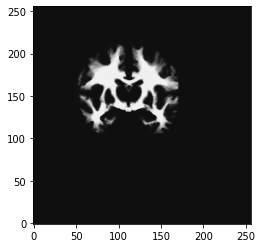

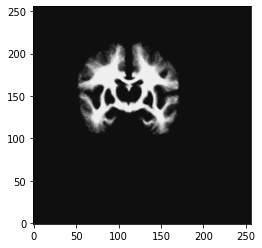

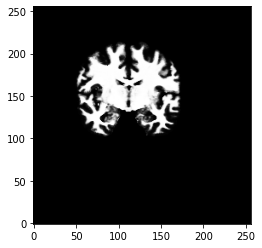

In [ ]:
# white matter

slice_nr=150
print(wm_multiplied[0].shape)
show_img(wm_multiplied[0][:,slice_nr,:])
show_img(wm_test[0][:,slice_nr,:])
show_img(wm_tissue_model[0][:,slice_nr,:])

(256, 316, 256)


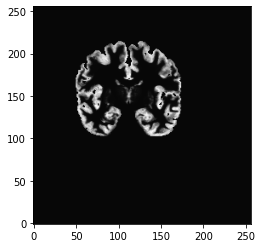

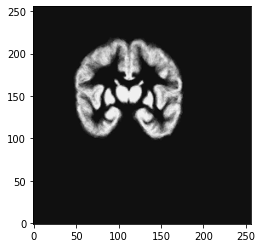

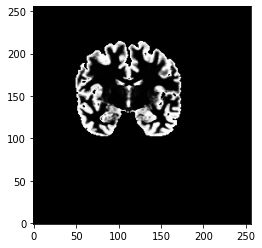

In [ ]:
# gray matter

slice_nr=150
print(gm_multiplied[0].shape)
show_img(gm_multiplied[0][:,slice_nr,:])
show_img(gm_test[0][:,slice_nr,:])
show_img(gm_tissue_model[0][:,slice_nr,:])

(256, 316, 256)


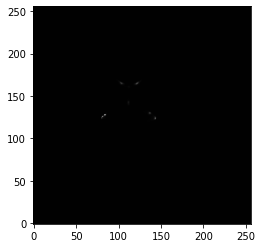

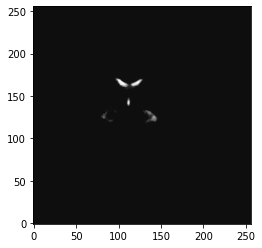

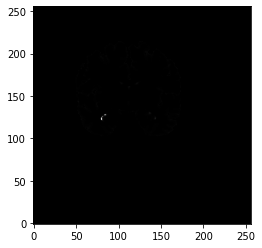

In [ ]:
# csf

slice_nr=150
print(csf_multiplied[0].shape)
show_img(csf_multiplied[0][:,slice_nr,:])
show_img(csf_test[0][:,slice_nr,:])
show_img(csf_tissue_model[0][:,slice_nr,:])

# Segmentation combining 1.1 and 1.2 Our Atlas

In [ ]:
# convention labels 
CSF_label = 1
GM_label = 3
WM_label = 2

# Assign GM, WM, CSF to voxel with highest probability
seg_img=[]

for i in range(20):
  GM = GM_label *((gm_multiplied[i] > csf_multiplied[i]) * (gm_multiplied[i] > wm_multiplied[i]))
  WM = WM_label * ((wm_multiplied[i] > csf_multiplied[i]) * (wm_multiplied[i] > gm_multiplied[i]))
  CSF = CSF_label *((csf_multiplied[i] > wm_multiplied[i]) * (csf_multiplied[i] > gm_multiplied[i]))
  seg_im =(GM+ WM + CSF)
  seg_img.append(seg_im)

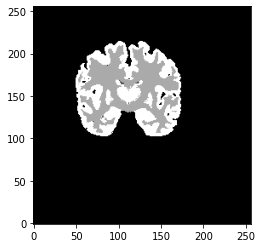

In [ ]:
show_img(seg_img[0][:,slice_nr,:])

In [ ]:
folder_list=["1003", "1004", "1005", "1018", "1019", "1023", "1024", "1025", "1038", "1039", "1101", "1104", "1107", "1110", "1113", "1116", "1119", "1122", "1125", "1128"]

folder_dir="/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/combined_seg"

for i in range(20):
 imgC=nib.Nifti1Image(seg_img[i],np.eye(4))
 imgC.header.get_xyzt_units()
 imgC.to_filename(os.path.join(folder_dir,'Combined_Segmentation_'+folder_list[i]+'.nii.gz'))

# Dice Our Atlas

In [ ]:

seg_img=[]

for directory_path in sorted(glob.glob("/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/combined_seg")):
    print(directory_path)
    for img_path in glob.glob(os.path.join(directory_path, "*.nii.gz")):
        print(img_path)
        img = nib.load(img_path)
        img_data=img.get_fdata()
        seg_img.append(img_data)
        

/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/combined_seg
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/combined_seg/Combined_Segmentation_1003.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/combined_seg/Combined_Segmentation_1004.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/combined_seg/Combined_Segmentation_1005.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/combined_seg/Combined_Segmentation_1018.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/combined_seg/Combined_Segmentation_1019.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/combined_seg/Combined_Segmentation_1023.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/combined_seg/Combined_Segmentation_1024.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/combined_seg/Combined_Segmentation_1025.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/combined_seg/Combined_Segmentation_1038.nii.gz
/con

In [ ]:
# convention labels 
CSF_label = 1
GM_label = 3
WM_label = 2

folder_list=["1003", "1004", "1005", "1018", "1019", "1023", "1024", "1025", "1038", "1039", "1101", "1104", "1107", "1110", "1113", "1116", "1119", "1122", "1125", "1128"]

dice_scores_all=pd.DataFrame(columns=['name','CSF Dice','GM Dice','WM Dice'])

for i in range(20):

  seg_CSF = (seg_img[i] == CSF_label) * 1
  gt_CSF = (label_test[i]== CSF_label) * 1

  seg_GM = (seg_img[i] == GM_label) * 1
  gt_GM = (label_test[i] == GM_label) * 1

  seg_WM = (seg_img[i] == WM_label) * 1
  gt_WM = (label_test[i] == WM_label) * 1

  
  dice_CSF = calc_dice(seg_CSF, gt_CSF)
  dice_GM = calc_dice(seg_GM, gt_GM)
  dice_WM = calc_dice(seg_WM, gt_WM)

  dice_scores={'name':folder_list[i],'CSF Dice':dice_CSF,'GM Dice':dice_GM,'WM Dice':dice_WM}
  dice_scores_all=dice_scores_all.append(dice_scores,ignore_index=True)

print(dice_scores_all)

    name  CSF Dice   GM Dice   WM Dice
0   1003  0.680684  0.910032  0.881372
1   1004  0.838292  0.954520  0.929479
2   1005  0.791070  0.949213  0.907865
3   1018  0.771616  0.950441  0.928294
4   1019  0.775088  0.957556  0.925323
5   1023  0.732960  0.945223  0.921962
6   1024  0.816213  0.956071  0.930818
7   1025  0.776070  0.949105  0.899610
8   1038  0.754289  0.954479  0.931903
9   1039  0.744051  0.955523  0.928557
10  1101  0.787812  0.947051  0.917953
11  1104  0.758475  0.936400  0.902909
12  1107  0.622380  0.869204  0.698481
13  1110  0.727104  0.947071  0.916532
14  1113  0.688060  0.862811  0.792629
15  1116  0.830411  0.943946  0.909874
16  1119  0.776006  0.911091  0.883525
17  1122  0.815680  0.910741  0.882491
18  1125  0.734481  0.937733  0.897984
19  1128  0.790200  0.927576  0.870182


In [ ]:
folder='/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/'
name='Combined_Our_Atlas_Dice'

if os.path.isfile(os.path.join(folder,name + '.csv')):
  print("File named '%s' already exists." %(name))
  exit()
else:
  dice_scores_all.to_csv(os.path.join(folder,name + '.csv'),mode='a',index=False)
  print("File named '%s' was created." %(name))

File named 'Combined_Our_Atlas_Dice' was created.


# Label Propagation CSF MNI Atlas

In [ ]:
csf_test=[]
#gm_test=[]
#wm_test=[]

for directory_path in sorted(glob.glob("/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_MNI/CSF*")):
    print(directory_path)
    for img_path in glob.glob(os.path.join(directory_path, "*.nii")):
        print(img_path)
        img = nib.load(img_path)
        img_data=img.get_fdata()
        csf_test.append(img_data)
      

/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_MNI/CSF
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_MNI/CSF/CSF_MNI_atlas_registered_probability_10_1003.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_MNI/CSF/CSF_MNI_atlas_registered_probability_10_1004.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_MNI/CSF/CSF_MNI_atlas_registered_probability_10_1005.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_MNI/CSF/CSF_MNI_atlas_registered_probability_10_1018.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_MNI/CSF/CSF_MNI_atlas_registered_probability_10_1019.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_MNI/CSF/CSF_MNI_atlas_registered_probability_10_1023.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_MNI/CSF/CSF_MNI_atlas_registered_probability_10_1024.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/r

# Label Propagation WM MNI Atlas

In [ ]:

#csf_test=[]
#gm_test=[]
wm_test=[]

for directory_path in sorted(glob.glob("/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_MNI/WM*")):
    print(directory_path)
    for img_path in glob.glob(os.path.join(directory_path, "*.nii")):
        print(img_path)
        img = nib.load(img_path)
        img_data=img.get_fdata()
        wm_test.append(img_data)
        

/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_MNI/WM
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_MNI/WM/WM_MNI_atlas_registered_probability_10_1003.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_MNI/WM/WM_MNI_atlas_registered_probability_10_1004.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_MNI/WM/WM_MNI_atlas_registered_probability_10_1005.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_MNI/WM/WM_MNI_atlas_registered_probability_10_1018.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_MNI/WM/WM_MNI_atlas_registered_probability_10_1019.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_MNI/WM/WM_MNI_atlas_registered_probability_10_1023.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_MNI/WM/WM_MNI_atlas_registered_probability_10_1024.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_MNI/W

# Label Propagation GM MNI Atlas

In [ ]:

#csf_test=[]
gm_test=[]
#wm_test=[]

for directory_path in sorted(glob.glob("/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_MNI/GM*")):
    print(directory_path)
    for img_path in glob.glob(os.path.join(directory_path, "*.nii")):
        print(img_path)
        img = nib.load(img_path)
        img_data=img.get_fdata()
        gm_test.append(img_data)
        

/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_MNI/GM
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_MNI/GM/GM_MNI_atlas_registered_probability_10_1003.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_MNI/GM/GM_MNI_atlas_registered_probability_10_1004.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_MNI/GM/GM_MNI_atlas_registered_probability_10_1005.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_MNI/GM/GM_MNI_atlas_registered_probability_10_1018.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_MNI/GM/GM_MNI_atlas_registered_probability_10_1019.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_MNI/GM/GM_MNI_atlas_registered_probability_10_1023.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_MNI/GM/GM_MNI_atlas_registered_probability_10_1024.nii
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/registered_MNI/G

# Multiply from 1.1 and 1.2 MNI Atlas

In [ ]:
csf_multiplied=[]
gm_multiplied=[]
wm_multiplied=[]

for i in range(len(csf_test)):
  csf_multiplied.append(np.multiply(csf_test[i],csf_tissue_model[i]))
  
  gm_multiplied.append(np.multiply(gm_test[i],gm_tissue_model[i]))
  
  wm_multiplied.append(np.multiply(wm_test[i],wm_tissue_model[i]))

(256, 316, 256)


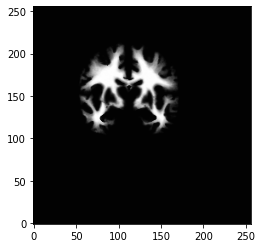

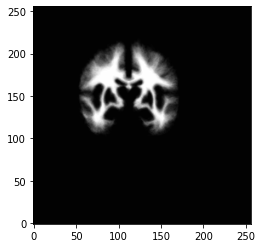

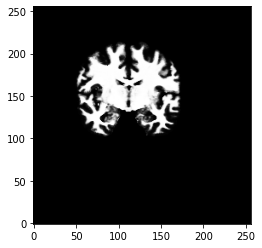

In [ ]:
# white matter

slice_nr=150
print(wm_multiplied[0].shape)
show_img(wm_multiplied[0][:,slice_nr,:])
show_img(wm_test[0][:,slice_nr,:])
show_img(wm_tissue_model[0][:,slice_nr,:])

(256, 316, 256)


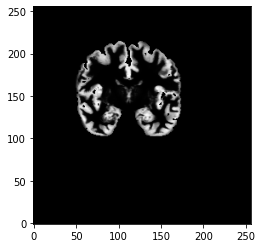

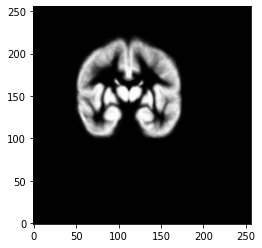

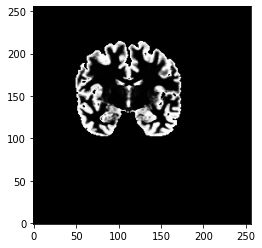

In [ ]:
# gray matter

slice_nr=150
print(gm_multiplied[0].shape)
show_img(gm_multiplied[0][:,slice_nr,:])
show_img(gm_test[0][:,slice_nr,:])
show_img(gm_tissue_model[0][:,slice_nr,:])

(256, 316, 256)


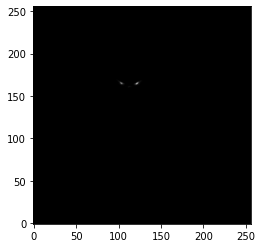

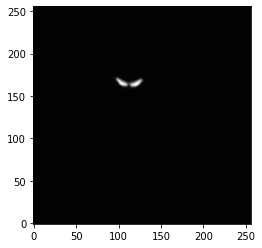

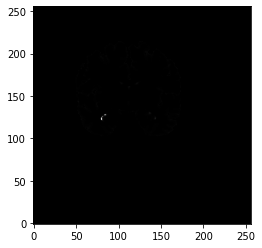

In [ ]:
# csf

slice_nr=150
print(csf_multiplied[0].shape)
show_img(csf_multiplied[0][:,slice_nr,:])
show_img(csf_test[0][:,slice_nr,:])
show_img(csf_tissue_model[0][:,slice_nr,:])

# Segmentation combining 1.1 and 1.2 MNI Atlas

In [ ]:
# convention labels 
CSF_label = 1
GM_label = 3
WM_label = 2

# Assign GM, WM, CSF to voxel with highest probability
seg_img=[]

for i in range(20):
  GM = GM_label *((gm_multiplied[i] > csf_multiplied[i]) * (gm_multiplied[i] > wm_multiplied[i]))
  WM = WM_label * ((wm_multiplied[i] > csf_multiplied[i]) * (wm_multiplied[i] > gm_multiplied[i]))
  CSF = CSF_label *((csf_multiplied[i] > wm_multiplied[i]) * (csf_multiplied[i] > gm_multiplied[i]))
  seg_im =(GM+ WM + CSF)
  seg_img.append(seg_im)

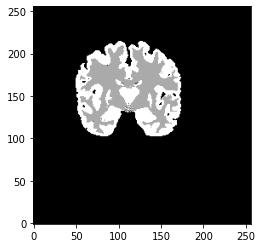

In [ ]:
show_img(seg_img[0][:,slice_nr,:])

In [ ]:
folder_list=["1003", "1004", "1005", "1018", "1019", "1023", "1024", "1025", "1038", "1039", "1101", "1104", "1107", "1110", "1113", "1116", "1119", "1122", "1125", "1128"]

folder_dir="/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/combined_seg_MNI"

for i in range(20):
 imgC=nib.Nifti1Image(seg_img[i],np.eye(4))
 imgC.header.get_xyzt_units()
 imgC.to_filename(os.path.join(folder_dir,'Combined_Segmentation_MNI'+folder_list[i]+'.nii.gz'))

# Dice MNI Atlas

In [ ]:

seg_img=[]

for directory_path in sorted(glob.glob("/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/combined_seg_MNI")):
    print(directory_path)
    for img_path in glob.glob(os.path.join(directory_path, "*.nii.gz")):
        print(img_path)
        img = nib.load(img_path)
        img_data=img.get_fdata()
        seg_img.append(img_data)
        

/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/combined_seg_MNI
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/combined_seg_MNI/Combined_Segmentation_MNI1003.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/combined_seg_MNI/Combined_Segmentation_MNI1004.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/combined_seg_MNI/Combined_Segmentation_MNI1005.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/combined_seg_MNI/Combined_Segmentation_MNI1018.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/combined_seg_MNI/Combined_Segmentation_MNI1019.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/combined_seg_MNI/Combined_Segmentation_MNI1023.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/combined_seg_MNI/Combined_Segmentation_MNI1024.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/combined_seg_MNI/Combined_Segmentation_MNI1025.nii.gz
/content/drive/MyDrive/MAIA/Semester 3/MISA/MIS

In [ ]:
# convention labels 
CSF_label = 1
GM_label = 3
WM_label = 2

folder_list=["1003", "1004", "1005", "1018", "1019", "1023", "1024", "1025", "1038", "1039", "1101", "1104", "1107", "1110", "1113", "1116", "1119", "1122", "1125", "1128"]

dice_scores_all=pd.DataFrame(columns=['name','CSF Dice','GM Dice','WM Dice'])

for i in range(20):

  seg_CSF = (seg_img[i] == CSF_label) * 1
  gt_CSF = (label_test[i]== CSF_label) * 1

  seg_GM = (seg_img[i] == GM_label) * 1
  gt_GM = (label_test[i] == GM_label) * 1

  seg_WM = (seg_img[i] == WM_label) * 1
  gt_WM = (label_test[i] == WM_label) * 1

  
  dice_CSF = calc_dice(seg_CSF, gt_CSF)
  dice_GM = calc_dice(seg_GM, gt_GM)
  dice_WM = calc_dice(seg_WM, gt_WM)

  dice_scores={'name':folder_list[i],'CSF Dice':dice_CSF,'GM Dice':dice_GM,'WM Dice':dice_WM}
  dice_scores_all=dice_scores_all.append(dice_scores,ignore_index=True)

print(dice_scores_all)

    name  CSF Dice   GM Dice   WM Dice
0   1003  0.146774  0.876013  0.840176
1   1004  0.259745  0.899482  0.849234
2   1005  0.615602  0.904708  0.847244
3   1018  0.261335  0.907093  0.869010
4   1019  0.170561  0.909200  0.845777
5   1023  0.172676  0.904793  0.869157
6   1024  0.232039  0.910185  0.865166
7   1025  0.606055  0.903918  0.834497
8   1038  0.275477  0.906769  0.863636
9   1039  0.163479  0.909812  0.860210
10  1101  0.403261  0.909449  0.865539
11  1104  0.307979  0.901044  0.850167
12  1107  0.248863  0.848486  0.670655
13  1110  0.346030  0.914630  0.871218
14  1113  0.316367  0.829433  0.754536
15  1116  0.529781  0.901939  0.846493
16  1119  0.560705  0.880888  0.849048
17  1122  0.533693  0.867132  0.830037
18  1125  0.642821  0.896415  0.855065
19  1128  0.514977  0.882813  0.803668


In [ ]:
folder='/content/drive/MyDrive/MAIA/Semester 3/MISA/MISA_MIRA_3/'
name='Combined_MNI_Atlas_Dice'

if os.path.isfile(os.path.join(folder,name + '.csv')):
  print("File named '%s' already exists." %(name))
  exit()
else:
  dice_scores_all.to_csv(os.path.join(folder,name + '.csv'),mode='a',index=False)
  print("File named '%s' was created." %(name))

File named 'Combined_MNI_Atlas_Dice' was created.
